In [1]:
# CS5834: Urban Computing Project - Part 1 
# NYC Air Quality Exploratory Data Analysis/Assessments
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import matplotlib.mlab as mlab
import sys
import operator 
import math
import sklearn.ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from collections import defaultdict
from scipy.cluster import hierarchy
from scipy.spatial import distance
from pandas.plotting import scatter_matrix
from geopandas import GeoDataFrame
from datetime import datetime, timedelta 
%matplotlib inline 

In [2]:
! pip install sklearn

In [3]:
! pip install pandas

In [4]:
!pip install geopandas 

In [5]:
df = pd.read_csv (r'/Users/lhcvlall/Desktop/CS5834.AZ.PROJ./6AQIDataset.FINAL.csv',encoding= 'unicode_escape')
print (df)
df.head(25)

      unique_id  Indicator_id  Benzene_AQI646  Formald._AQI647  PM2.5_AQI365  \
0      179647.0         365.0             0.0              0.0          9.81   
1      179652.0         365.0             0.0              0.0          8.80   
2      179657.0         365.0             0.0              0.0          9.44   
3      179662.0         365.0             0.0              0.0          8.35   
4      179667.0         365.0             0.0              0.0          7.98   
...         ...           ...             ...              ...           ...   
5324        NaN           NaN             NaN              NaN           NaN   
5325        NaN           NaN             NaN              NaN           NaN   
5326        NaN           NaN             NaN              NaN           NaN   
5327        NaN           NaN             NaN              NaN           NaN   
5328        NaN           NaN             NaN              NaN           NaN   

      NO2_AQI375  O3_AQI386  SO2_AQI383

,unique_id,Indicator_id,Benzene_AQI646,Formald._AQI647,PM2.5_AQI365,NO2_AQI375,O3_AQI386,SO2_AQI383,TD,Measure,...,geo_place_name,Lat.,Long.,Year,time_period,start_date,Ranking_per_NYC Mean,Ranking_per_NAAQS,Ranking_Clean #1to#7_per NAAQS,Ranking_Clean #1to#7_per NYC Mean
0,179647.0,365.0,0.0,0.0,9.81,0.0,0.0,0.0,0.0,Mean,...,Staten Island,40.57902,-74.15154,2008.0,Annual Average 2009,12/1/08,C,C,4.0,4.0
1,179652.0,365.0,0.0,0.0,8.80,0.0,0.0,0.0,0.0,Mean,...,Staten Island,40.57902,-74.15154,2009.0,Annual Average 2010,12/1/09,C,B,5.0,4.0
2,179657.0,365.0,0.0,0.0,9.44,0.0,0.0,0.0,0.0,Mean,...,Staten Island,40.57902,-74.15154,2010.0,Annual Average 2011,12/1/10,C,C,4.0,4.0
3,179662.0,365.0,0.0,0.0,8.35,0.0,0.0,0.0,0.0,Mean,...,Staten Island,40.57902,-74.15154,2011.0,Annual Average 2012,12/1/11,C,B,5.0,4.0
4,179667.0,365.0,0.0,0.0,7.98,0.0,0.0,0.0,0.0,Mean,...,Staten Island,40.57902,-74.15154,2012.0,Annual Average 2013,12/1/12,C,B,5.0,4.0
5,211439.0,365.0,0.0,0.0,8.41,0.0,0.0,0.0,0.0,Mean,...,Staten Island,40.57902,-74.15154,2013.0,Annual Average 2014,12/1/13,C,B,5.0,4.0
6,333949.0,365.0,0.0,0.0,7.69,0.0,0.0,0.0,0.0,Mean,...,Staten Island,40.57902,-74.15154,2015.0,Annual Average 2015,1/1/15,C,B,5.0,4.0
7,410734.0,365.0,0.0,0.0,6.84,0.0,0.0,0.0,0.0,Mean,...,Staten Island,40.57902,-74.15154,2015.0,Annual Average 2016,12/31/15,B,B,5.0,5.0
8,547366.0,365.0,0.0,0.0,6.81,0.0,0.0,0.0,0.0,Mean,...,Staten Island,40.57902,-74.15154,2017.0,Annual Average 2017,1/1/17,B,B,5.0,5.0
9,605660.0,365.0,0.0,0.0,6.40,0.0,0.0,0.0,0.0,Mean,...,Staten Island,40.57902,-74.15154,2018.0,Annual Average 2018,1/1/18,B,B,5.0,5.0


In [6]:
null_values=pd.read_csv (r'/Users/lhcvlall/Desktop/CS5834.AZ.PROJ./6AQIDataset.FINAL.csv',encoding= 'unicode_escape')
print (df)
null_values.fillna(method='bfill')
null_values.fillna(0)

      unique_id  Indicator_id  Benzene_AQI646  Formald._AQI647  PM2.5_AQI365  \
0      179647.0         365.0             0.0              0.0          9.81   
1      179652.0         365.0             0.0              0.0          8.80   
2      179657.0         365.0             0.0              0.0          9.44   
3      179662.0         365.0             0.0              0.0          8.35   
4      179667.0         365.0             0.0              0.0          7.98   
...         ...           ...             ...              ...           ...   
5324        NaN           NaN             NaN              NaN           NaN   
5325        NaN           NaN             NaN              NaN           NaN   
5326        NaN           NaN             NaN              NaN           NaN   
5327        NaN           NaN             NaN              NaN           NaN   
5328        NaN           NaN             NaN              NaN           NaN   

      NO2_AQI375  O3_AQI386  SO2_AQI383

,unique_id,Indicator_id,Benzene_AQI646,Formald._AQI647,PM2.5_AQI365,NO2_AQI375,O3_AQI386,SO2_AQI383,TD,Measure,...,geo_place_name,Lat.,Long.,Year,time_period,start_date,Ranking_per_NYC Mean,Ranking_per_NAAQS,Ranking_Clean #1to#7_per NAAQS,Ranking_Clean #1to#7_per NYC Mean
0,179647.0,365.0,0.0,0.0,9.81,0.0,0.0,0.0,0.0,Mean,...,Staten Island,40.57902,-74.15154,2008.0,Annual Average 2009,12/1/08,C,C,4.0,4.0
1,179652.0,365.0,0.0,0.0,8.80,0.0,0.0,0.0,0.0,Mean,...,Staten Island,40.57902,-74.15154,2009.0,Annual Average 2010,12/1/09,C,B,5.0,4.0
2,179657.0,365.0,0.0,0.0,9.44,0.0,0.0,0.0,0.0,Mean,...,Staten Island,40.57902,-74.15154,2010.0,Annual Average 2011,12/1/10,C,C,4.0,4.0
3,179662.0,365.0,0.0,0.0,8.35,0.0,0.0,0.0,0.0,Mean,...,Staten Island,40.57902,-74.15154,2011.0,Annual Average 2012,12/1/11,C,B,5.0,4.0
4,179667.0,365.0,0.0,0.0,7.98,0.0,0.0,0.0,0.0,Mean,...,Staten Island,40.57902,-74.15154,2012.0,Annual Average 2013,12/1/12,C,B,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,...,0,0.00000,0.00000,0.0,0,0,0,0,0.0,0.0
5325,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,...,0,0.00000,0.00000,0.0,0,0,0,0,0.0,0.0
5326,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,...,0,0.00000,0.00000,0.0,0,0,0,0,0.0,0.0
5327,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,...,0,0.00000,0.00000,0.0,0,0,0,0,0.0,0.0


In [7]:
import datetime
import warnings
sys.path.insert(0,'../')
%load_ext autoreload
%autoreload 2
warnings.filterwarnings('ignore')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5329 entries, 0 to 5328
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   unique_id                          5317 non-null   float64
 1   Indicator_id                       5317 non-null   float64
 2   Benzene_AQI646                     5317 non-null   float64
 3   Formald._AQI647                    5317 non-null   float64
 4   PM2.5_AQI365                       5317 non-null   float64
 5   NO2_AQI375                         5317 non-null   float64
 6   O3_AQI386                          5317 non-null   float64
 7   SO2_AQI383                         5317 non-null   float64
 8   TD                                 5317 non-null   float64
 9   Measure                            5317 non-null   object 
 10  geo_type_name                      5317 non-null   object 
 11  geo_join_id                        5317 non-null   float

In [9]:
df.isnull().values.sum()

756

In [10]:
df.isnull().values.sum()

756

In [11]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab36a10ca0>,
      dtype=object)

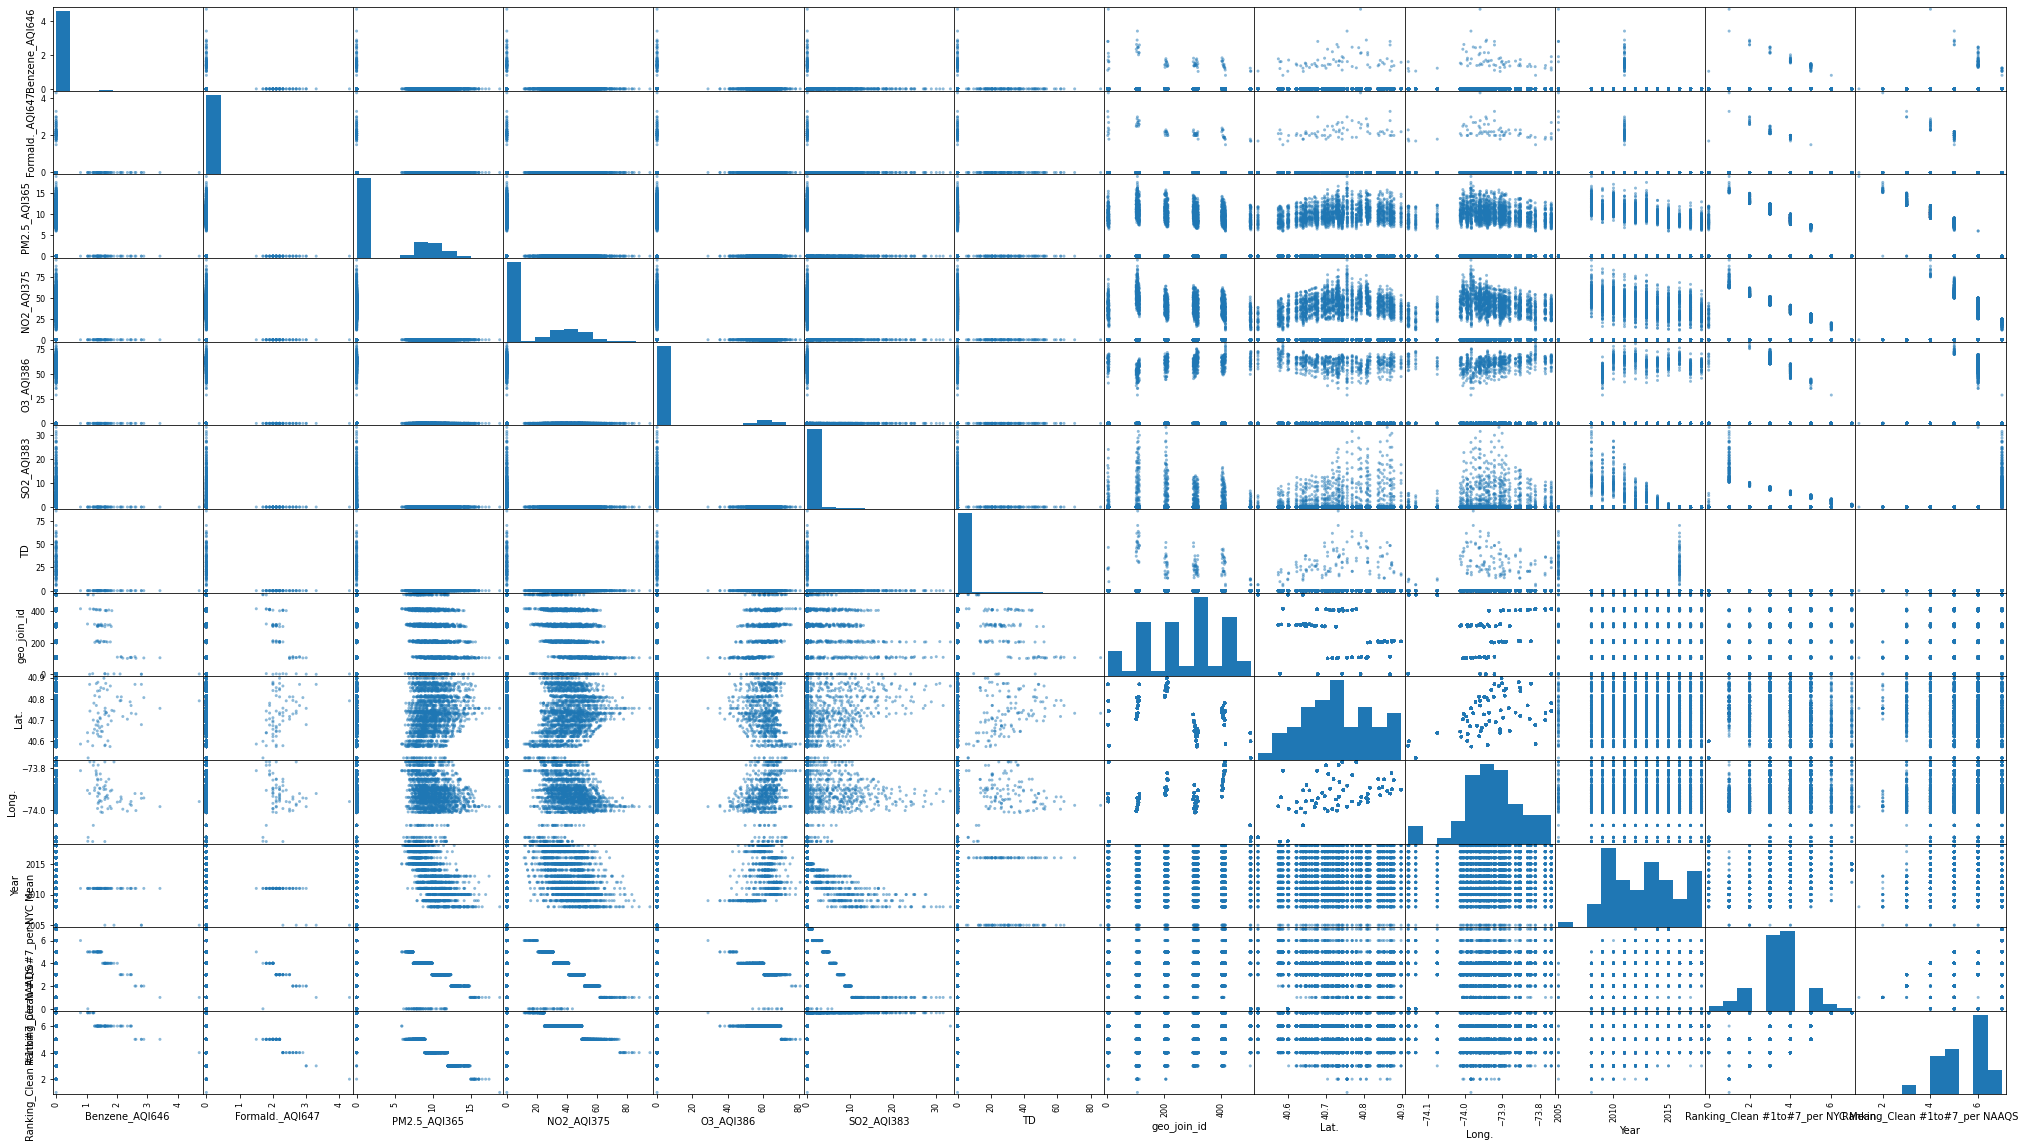

In [12]:
attributes =["Benzene_AQI646","Formald._AQI647","PM2.5_AQI365","NO2_AQI375","O3_AQI386","SO2_AQI383","TD","geo_join_id","Lat.","Long.","Year","time_period","start_date","Ranking_Clean #1to#7_per NYC Mean","Ranking_Clean #1to#7_per NAAQS","Ranking_per_NYC Mean","Ranking_per_NAAQS"]
scatter_matrix(df[attributes],figsize=(35,20))

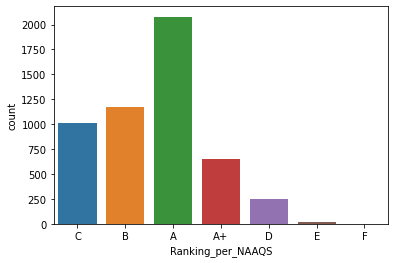

In [13]:
sns.countplot(df["Ranking_per_NAAQS"])
plt.show()

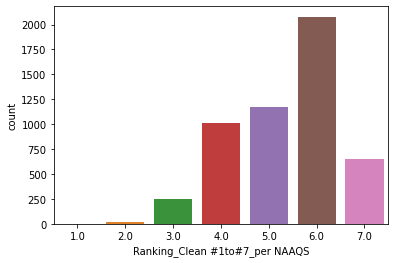

In [14]:
sns.countplot(df["Ranking_Clean #1to#7_per NAAQS"])

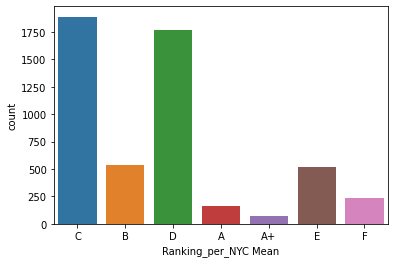

In [15]:
sns.countplot(df["Ranking_per_NYC Mean"])
plt.show()

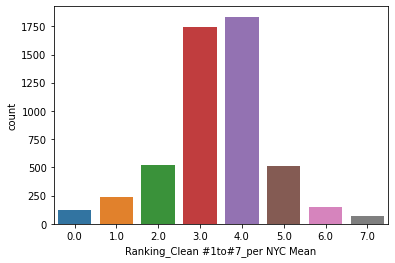

In [16]:
sns.countplot(df["Ranking_Clean #1to#7_per NYC Mean"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab3e0b47f0>,
      dtype=object)

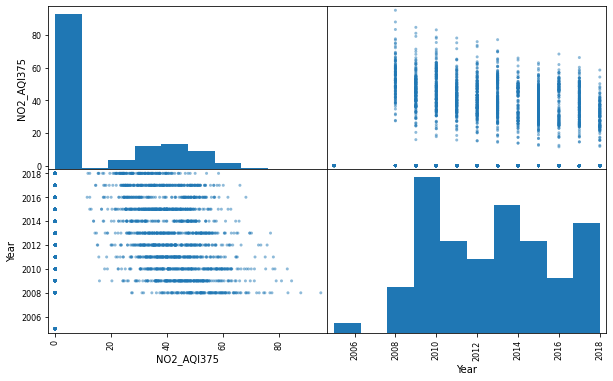

In [17]:
attributes =["NO2_AQI375","Year"]
scatter_matrix(df[attributes],figsize=(10,6))

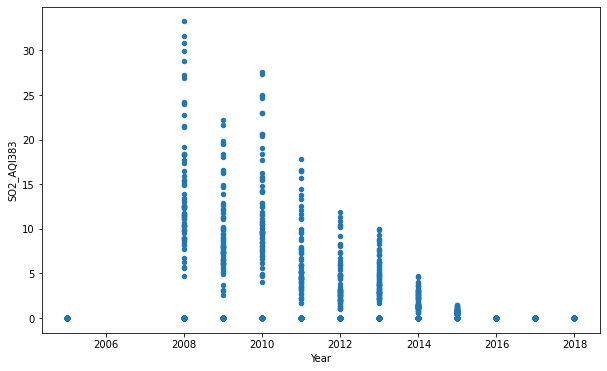

In [18]:
df.plot(kind="scatter",y="SO2_AQI383",x="Year",figsize=(10,6))

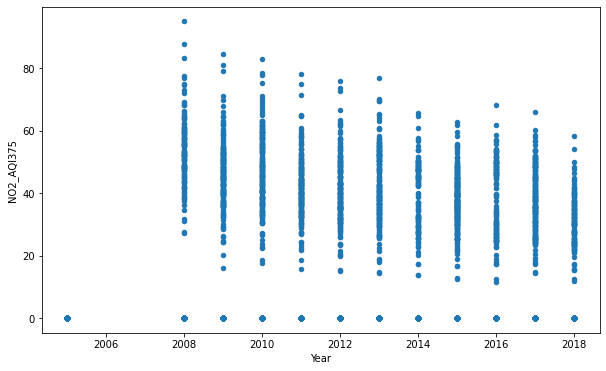

In [19]:
df.plot(kind="scatter",y="NO2_AQI375",x="Year",figsize=(10,6))

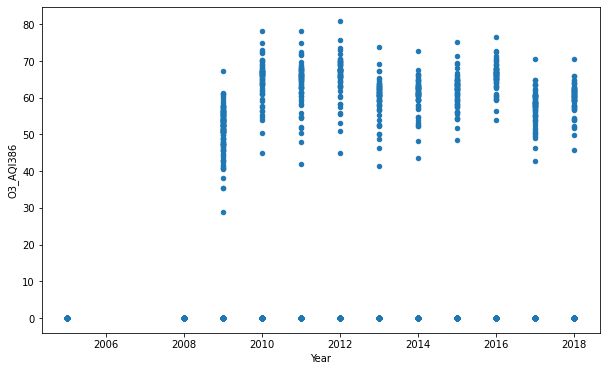

In [20]:
df.plot(kind="scatter",y="O3_AQI386",x="Year",figsize=(10,6))

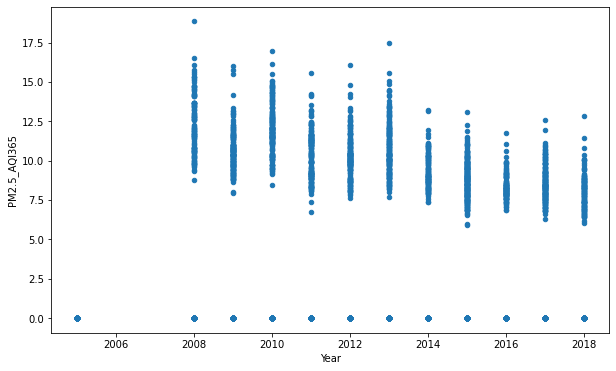

In [21]:
df.plot(kind="scatter",y="PM2.5_AQI365",x="Year",figsize=(10,6))

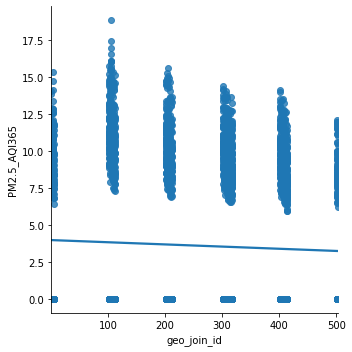

In [22]:
import seaborn as sns
import pandas as pd
from io import StringIO
data = df[['PM2.5_AQI365','geo_join_id']] 
sns.lmplot(y='PM2.5_AQI365',x='geo_join_id', data=df, ci=None)

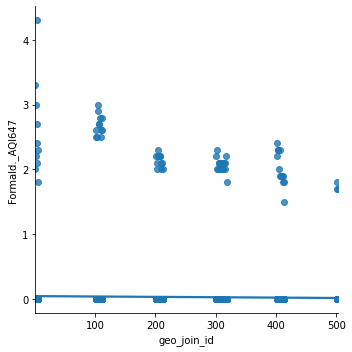

In [23]:
import seaborn as sns
import pandas as pd
from io import StringIO
data = df[['Formald._AQI647','geo_join_id']] 
sns.lmplot(y='Formald._AQI647',x='geo_join_id', data=df, ci=None)

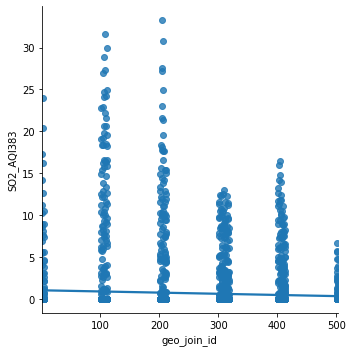

In [24]:
import seaborn as sns
import pandas as pd
from io import StringIO
data = df[['SO2_AQI383','geo_join_id']] 
sns.lmplot(y='SO2_AQI383',x='geo_join_id', data=df, ci=None)

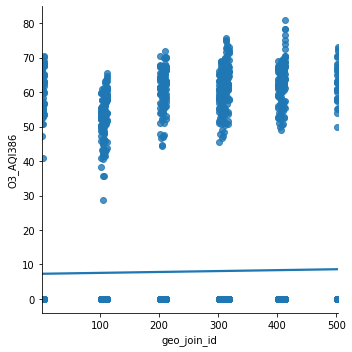

In [25]:
import seaborn as sns
import pandas as pd
from io import StringIO
data = df[['O3_AQI386','geo_join_id']] 
sns.lmplot(y='O3_AQI386',x='geo_join_id', data=df, ci=None)

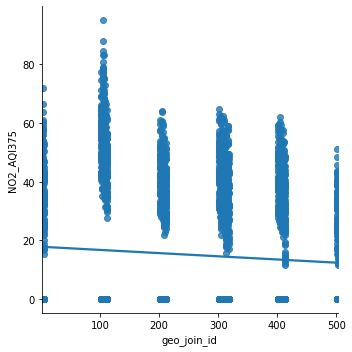

In [26]:
import seaborn as sns
import pandas as pd
from io import StringIO
data = df[['NO2_AQI375','geo_join_id']] 
sns.lmplot(y='NO2_AQI375',x='geo_join_id', data=df, ci=None)

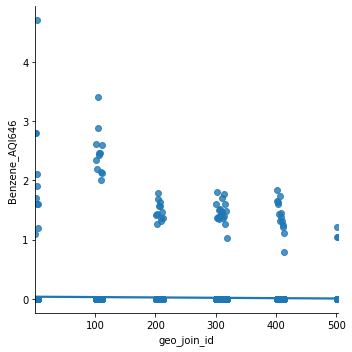

In [27]:
import seaborn as sns
import pandas as pd
from io import StringIO
data = df[['Benzene_AQI646','geo_join_id']] 
sns.lmplot(y='Benzene_AQI646',x='geo_join_id', data=df, ci=None)

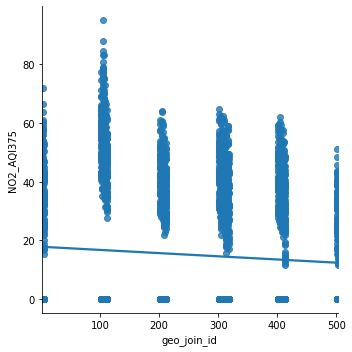

In [28]:
import seaborn as sns
import pandas as pd
from io import StringIO
data = df[['Formald._AQI647','geo_join_id']] 
sns.lmplot(y='NO2_AQI375',x='geo_join_id', data=df, ci=None)

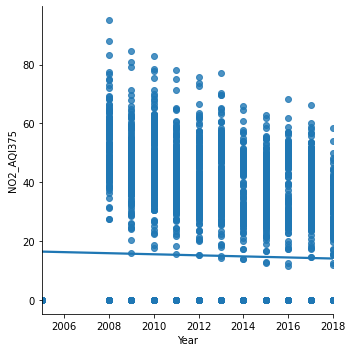

In [29]:
import seaborn as sns
import pandas as pd
from io import StringIO
data = df[['NO2_AQI375','Year']] 
sns.lmplot(y='NO2_AQI375',x='Year', data=df, ci=None)

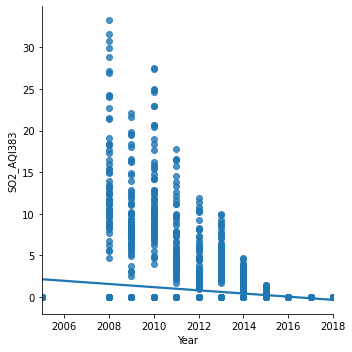

In [30]:
import seaborn as sns
import pandas as pd
from io import StringIO
data = df[['SO2_AQI383','Year']] 
sns.lmplot(y='SO2_AQI383',x='Year', data=df, ci=None)

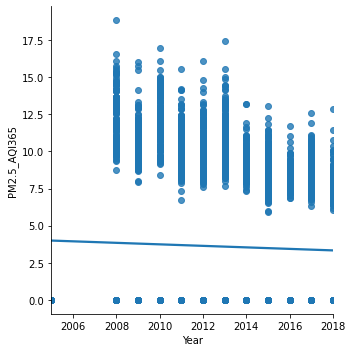

In [31]:
import seaborn as sns
import pandas as pd
from io import StringIO
data = df[['PM2.5_AQI365','Year']] 
sns.lmplot(y='PM2.5_AQI365',x='Year', data=df, ci=None)

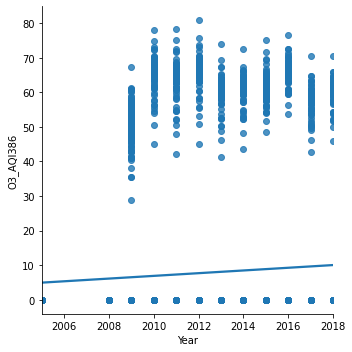

In [32]:
import seaborn as sns
import pandas as pd
from io import StringIO
data = df[['O3_AQI386','Year']] 
sns.lmplot(y='O3_AQI386',x='Year', data=df, ci=None)

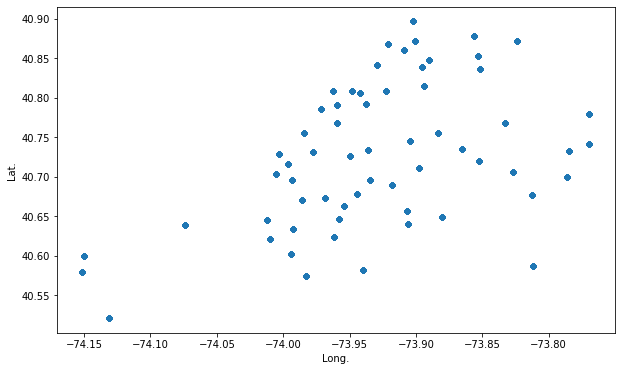

In [33]:
import urllib 
import os
import tarfile 
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
df.plot(kind="scatter",x="Long.",y="Lat.",alpha=.4,figsize=(10,6))
plt.show()


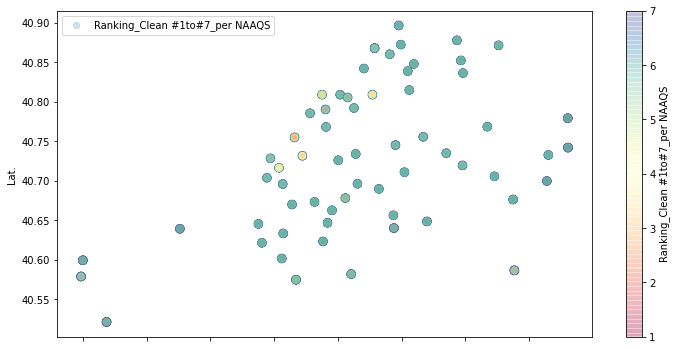

In [34]:
df.plot(kind="scatter",x="Long.",y="Lat.",alpha=0.2,s=df["Ranking_Clean #1to#7_per NAAQS"]*10,label="Ranking_Clean #1to#7_per NAAQS",figsize=(12,6),c="Ranking_Clean #1to#7_per NAAQS",cmap=plt.get_cmap("Spectral"),colorbar=True,)
plt.legend()
plt.show()

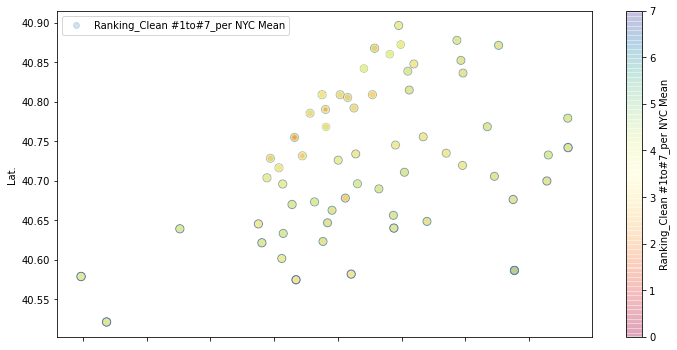

In [35]:
df.plot(kind="scatter",x="Long.",y="Lat.",alpha=0.2,s=df["Ranking_Clean #1to#7_per NYC Mean"]*10,label="Ranking_Clean #1to#7_per NYC Mean",figsize=(12,6),c="Ranking_Clean #1to#7_per NYC Mean",cmap=plt.get_cmap("Spectral"),colorbar=True,)
plt.legend()
plt.show()

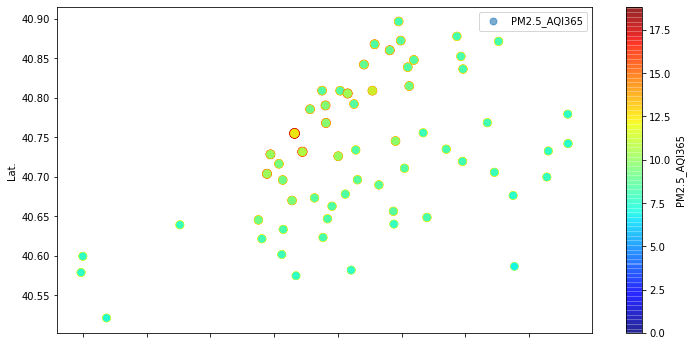

In [36]:
df.plot(kind="scatter",x="Long.",y="Lat.",alpha=0.6,s=df["PM2.5_AQI365"]*5,label="PM2.5_AQI365",figsize=(12,6),c="PM2.5_AQI365",cmap=plt.get_cmap("jet"),colorbar=True,)
plt.legend()
plt.show()

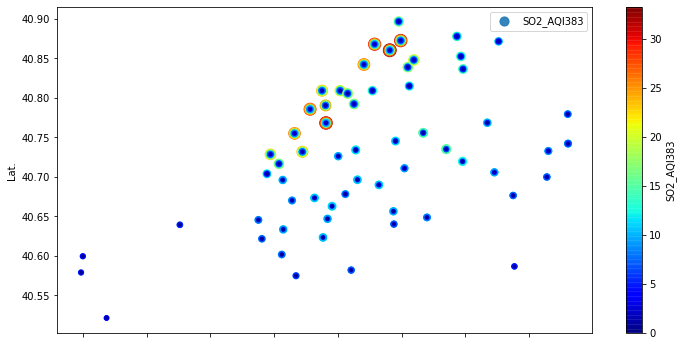

In [37]:
df.plot(kind="scatter",x="Long.",y="Lat.",alpha=0.9,s=df["SO2_AQI383"]*5,label="SO2_AQI383",figsize=(12,6),c="SO2_AQI383",cmap=plt.get_cmap("jet"),colorbar=True,)
plt.legend()
plt.show()

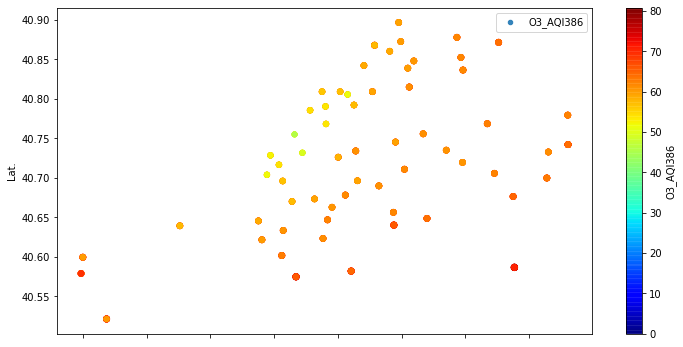

In [38]:
df.plot(kind="scatter",x="Long.",y="Lat.",alpha=0.9,s=df["O3_AQI386"]/2,label="O3_AQI386",figsize=(12,6),c="O3_AQI386",cmap=plt.get_cmap("jet"),colorbar=True,)
plt.legend()
plt.show()

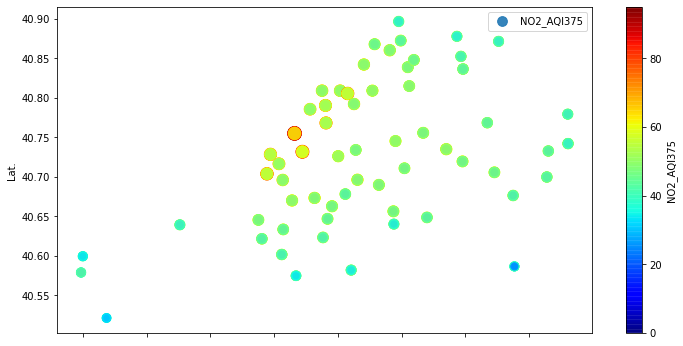

In [39]:
df.plot(kind="scatter",x="Long.",y="Lat.",alpha=0.9,s=df["NO2_AQI375"]*2,label="NO2_AQI375",figsize=(12,6),c="NO2_AQI375",cmap=plt.get_cmap("jet"),colorbar=True,)
plt.legend()
plt.show()

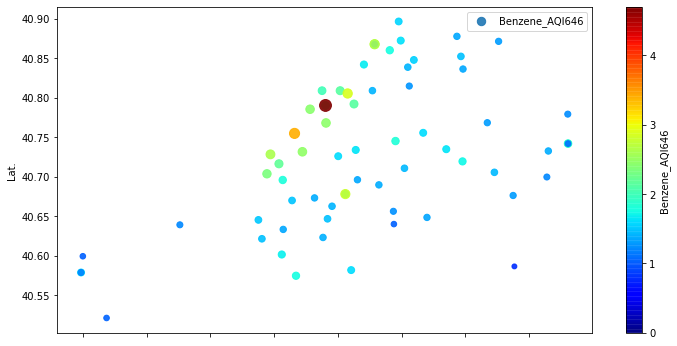

In [40]:
df.plot(kind="scatter",x="Long.",y="Lat.",alpha=0.9,s=df["Benzene_AQI646"]*30,label="Benzene_AQI646",figsize=(12,6),c="Benzene_AQI646",cmap=plt.get_cmap("jet"),colorbar=True,)
plt.legend()
plt.show()

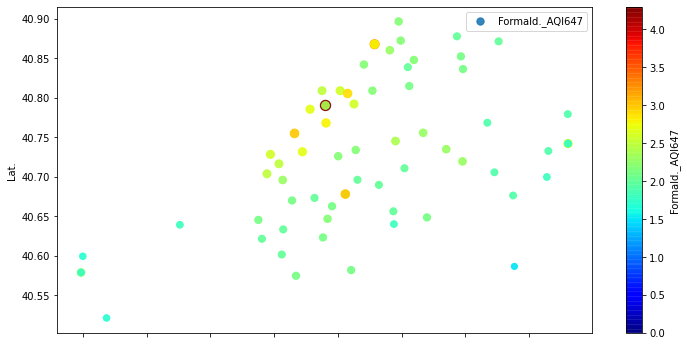

In [41]:
df.plot(kind="scatter",x="Long.",y="Lat.",alpha=0.9,s=df["Formald._AQI647"]*25,label="Formald._AQI647",figsize=(12,6),c="Formald._AQI647",cmap=plt.get_cmap("jet"),colorbar=True,)
plt.legend()
plt.show()

In [42]:
#End